# Introductory applied machine learning
# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [337]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [338]:
# (1) # Your Code goes here:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')

# Get a feeling for the data
# Because there are only 521 attributes, I decided to display all of them to get a better picture of the dataset
pd.set_option('display.max_columns', None)
display(news_raw.head(5))
display(news_raw.tail(5))
display(news_raw.describe())
print('Number of samples: {}, number of attributes: {}'.format(news_raw.shape[0], news_raw.shape[1]))

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,w11_buying,w12_internet,w13_slots,w14_compatible,w15_transfer,w16_baltimore,w17_mean,w18_person,w19_performance,w20_support,w21_tor,w22_gm,w23_mouse,w24_base,w25_population,w26_bob,w27_set,w28_it,w29_earth,w30_faith,w31_steve,w32_caps,w33_printer,w34_east,w35_cable,w36_adapter,w37_mss,w38_catcher,w39_bullpen,w40_obp,w41_innocent,w42_european,w43_angeles,w44_settings,w45_words,w46_rit,w47_shots,w48_ports,w49_vga,w50_coverage,w51_jumpers,w52_bases,w53_sea,w54_pts,w55_behavior,w56_domi,w57_sabres,w58_yzerman,w59_messier,w60_goalies,w61_hawks,w62_our,w63_sx,w64_view,w65_hitters,w66_richard,w67_point,w68_nyi,w69_mvp,w70_kill,w71_nl,w72_field,w73_connector,w74_stars,w75_th,w76_install,w77_traded,w78_configuration,w79_standard,w80_rotation,w81_ultb,w82_sports,w83_pds,w84_canada,w85_did,w86_clock,w87_first,w88_switch,w89_tonight,w90_record,w91_singer,w92_majors,w93_royals,w94_does,w95_flames,w96_of,w97_series,w98_plays,w99_det,w100_pitched,w101_cmos,w102_bobby,w103_morris,w104_saturn,w105_wwc,w106_nubus,w107_john,w108_defined,w109_fax,w110_graphics,w111_driver,w112_conference,w113_sgi,w114_yoyo,w115_early,w116_uses,w117_average,w118_as,w119_run,w120_jewish,w121_duo,w122_canadiens,w123_probert,w124_innings,w125_device,w126_species,w127_city,w128_so,w129_stadium,w130_sharks,w131_define,w132_man,w133_philadelphia,w134_monash,w135_works,w136_abc,w137_irq,w138_pin,w139_devices,w140_vice,w141_help,w142_kings,w143_example,w144_via,w145_champs,w146_are,w147_whalers,w148_fpu,w149_newton,w150_sense,w151_canadian,w152_then,w153_law,w154_certainly,w155_access,w156_ati,w157_fact,w158_price,w159_sandvik,w160_muslims,w161_ms,w162_things,w163_explain,w164_arena,w165_bure,w166_saying,w167_murder,w168_inning,w169_reds,w170_history,w171_young,w172_many,w173_gary,w174_arguments,w175_monitors,w176_au,w177_disks,w178_think,w179_points,w180_york,w181_mantis,w182_mangoe,w183_darice,w184_society,w185_believe,w186_tie,w187_bat,w188_jagr,w189_do,w190_penalty,w191_adams,w192_which,w193_gods,w194_that,w195_offense,w196_rockies,w197_atlanta,w198_beliefs,w199_capitals,w200_maynard,w201_alt,w202_minnesota,w203_rice,w204_religions,w205_hartford,w206_apr,w207_boot,w208_allan,w209_why,w210_orioles,w211_my,w212_cannot,w213_cd,w214_social,w215_nature,w216_definition,w217_simm,w218_faster,w219_not,w220_external,w221_lciii,w222_serial,w223_gretzky,w224_smythe,w225_habs,w226_maple,w227_watch,w228_umd,w229_gap,w230_jays,w231_vram,w232_program,w233_laws,w234_laurentian,w235_finals,w236_in,w237_interface,w238_defense,w239_ottawa,w240_info,w241_internal,w242_accept,w243_christians,w244_wingate,w245_penalties,w246_chicago,w247_hits,w248_defensive,w249_statement,w250_com,w251_espn,w252_ted,w253_their,w254_hitting,w255_humans,w256_ibm,w257_alomar,w258_dodgers,w259_mathew,w260_batting,w261_cards,w262_existence,w263_hr,w264_false,w265_next,w266_macs,w267_career,w268_cco,w269_canucks,w270_agree,w271_meg,w272_objective,w273_tek,w274_punishment,w275_snm,w276_buphy,w277_eisa,w278_cache,w279_se,w280_mike,w281_ico,w282_caltech,w283_mario,w284_years,w285_night,w286_staff,w287_schneider,w288_yankees,w289_buffalo,w290_by,w291_chip,w292_rom,w293_against,w294_louis,w295_screen,w296_contact,w297_modem,w298_jersey,w299_upgrade,w300_bobbe,w301_beauchaine,w302_jaeger,w303_iisi,w304_machine,w305_gilmour,w306_oilers,w307_roger,w308_rbi,w309_exist,w310_uk,w311_natural,w312_advance,w313_hi,w314_lindros,w315_goalie,w316_edmonton,w317_gregg,w318_drivers,w319_pitch,w320_red,w321_beat,w322_life,w323_they,w324_machines,w325_data,w326_potvin,w327_score,w328_stats,w329_edu,w330_scoring,w331_cpu,w332_st,w333_puck,w334_ramsey,w335_see,w336_patrick,w337_jon,w338_pitchers,w339_sox,w340_christianity,w341_wins,w342_hd,w343_round,w344_must,w345_flyers,w346_mode,w347_claim,w348_cubs,w349_therefore,w350_sport,w351_winning,w352_work,w353_memory,w354_norris,w355_video,w356_vancouver,w357_vlb,w358_montreal,w359_selanne,w360_powe

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,w11_buying,w12_internet,w13_slots,w14_compatible,w15_transfer,w16_baltimore,w17_mean,w18_person,w19_performance,w20_support,w21_tor,w22_gm,w23_mouse,w24_base,w25_population,w26_bob,w27_set,w28_it,w29_earth,w30_faith,w31_steve,w32_caps,w33_printer,w34_east,w35_cable,w36_adapter,w37_mss,w38_catcher,w39_bullpen,w40_obp,w41_innocent,w42_european,w43_angeles,w44_settings,w45_words,w46_rit,w47_shots,w48_ports,w49_vga,w50_coverage,w51_jumpers,w52_bases,w53_sea,w54_pts,w55_behavior,w56_domi,w57_sabres,w58_yzerman,w59_messier,w60_goalies,w61_hawks,w62_our,w63_sx,w64_view,w65_hitters,w66_richard,w67_point,w68_nyi,w69_mvp,w70_kill,w71_nl,w72_field,w73_connector,w74_stars,w75_th,w76_install,w77_traded,w78_configuration,w79_standard,w80_rotation,w81_ultb,w82_sports,w83_pds,w84_canada,w85_did,w86_clock,w87_first,w88_switch,w89_tonight,w90_record,w91_singer,w92_majors,w93_royals,w94_does,w95_flames,w96_of,w97_series,w98_plays,w99_det,w100_pitched,w101_cmos,w102_bobby,w103_morris,w104_saturn,w105_wwc,w106_nubus,w107_john,w108_defined,w109_fax,w110_graphics,w111_driver,w112_conference,w113_sgi,w114_yoyo,w115_early,w116_uses,w117_average,w118_as,w119_run,w120_jewish,w121_duo,w122_canadiens,w123_probert,w124_innings,w125_device,w126_species,w127_city,w128_so,w129_stadium,w130_sharks,w131_define,w132_man,w133_philadelphia,w134_monash,w135_works,w136_abc,w137_irq,w138_pin,w139_devices,w140_vice,w141_help,w142_kings,w143_example,w144_via,w145_champs,w146_are,w147_whalers,w148_fpu,w149_newton,w150_sense,w151_canadian,w152_then,w153_law,w154_certainly,w155_access,w156_ati,w157_fact,w158_price,w159_sandvik,w160_muslims,w161_ms,w162_things,w163_explain,w164_arena,w165_bure,w166_saying,w167_murder,w168_inning,w169_reds,w170_history,w171_young,w172_many,w173_gary,w174_arguments,w175_monitors,w176_au,w177_disks,w178_think,w179_points,w180_york,w181_mantis,w182_mangoe,w183_darice,w184_society,w185_believe,w186_tie,w187_bat,w188_jagr,w189_do,w190_penalty,w191_adams,w192_which,w193_gods,w194_that,w195_offense,w196_rockies,w197_atlanta,w198_beliefs,w199_capitals,w200_maynard,w201_alt,w202_minnesota,w203_rice,w204_religions,w205_hartford,w206_apr,w207_boot,w208_allan,w209_why,w210_orioles,w211_my,w212_cannot,w213_cd,w214_social,w215_nature,w216_definition,w217_simm,w218_faster,w219_not,w220_external,w221_lciii,w222_serial,w223_gretzky,w224_smythe,w225_habs,w226_maple,w227_watch,w228_umd,w229_gap,w230_jays,w231_vram,w232_program,w233_laws,w234_laurentian,w235_finals,w236_in,w237_interface,w238_defense,w239_ottawa,w240_info,w241_internal,w242_accept,w243_christians,w244_wingate,w245_penalties,w246_chicago,w247_hits,w248_defensive,w249_statement,w250_com,w251_espn,w252_ted,w253_their,w254_hitting,w255_humans,w256_ibm,w257_alomar,w258_dodgers,w259_mathew,w260_batting,w261_cards,w262_existence,w263_hr,w264_false,w265_next,w266_macs,w267_career,w268_cco,w269_canucks,w270_agree,w271_meg,w272_objective,w273_tek,w274_punishment,w275_snm,w276_buphy,w277_eisa,w278_cache,w279_se,w280_mike,w281_ico,w282_caltech,w283_mario,w284_years,w285_night,w286_staff,w287_schneider,w288_yankees,w289_buffalo,w290_by,w291_chip,w292_rom,w293_against,w294_louis,w295_screen,w296_contact,w297_modem,w298_jersey,w299_upgrade,w300_bobbe,w301_beauchaine,w302_jaeger,w303_iisi,w304_machine,w305_gilmour,w306_oilers,w307_roger,w308_rbi,w309_exist,w310_uk,w311_natural,w312_advance,w313_hi,w314_lindros,w315_goalie,w316_edmonton,w317_gregg,w318_drivers,w319_pitch,w320_red,w321_beat,w322_life,w323_they,w324_machines,w325_data,w326_potvin,w327_score,w328_stats,w329_edu,w330_scoring,w331_cpu,w332_st,w333_puck,w334_ramsey,w335_see,w336_patrick,w337_jon,w338_pitchers,w339_sox,w340_christianity,w341_wins,w342_hd,w343_round,w344_must,w345_flyers,w346_mode,w347_claim,w348_cubs,w349_therefore,w350_sport,w351_winning,w352_work,w353_memory,w354_norris,w355_video,w356_vancouver,w357_vlb,w358_montreal,w359_selanne,w360_powe

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,w11_buying,w12_internet,w13_slots,w14_compatible,w15_transfer,w16_baltimore,w17_mean,w18_person,w19_performance,w20_support,w21_tor,w22_gm,w23_mouse,w24_base,w25_population,w26_bob,w27_set,w28_it,w29_earth,w30_faith,w31_steve,w32_caps,w33_printer,w34_east,w35_cable,w36_adapter,w37_mss,w38_catcher,w39_bullpen,w40_obp,w41_innocent,w42_european,w43_angeles,w44_settings,w45_words,w46_rit,w47_shots,w48_ports,w49_vga,w50_coverage,w51_jumpers,w52_bases,w53_sea,w54_pts,w55_behavior,w56_domi,w57_sabres,w58_yzerman,w59_messier,w60_goalies,w61_hawks,w62_our,w63_sx,w64_view,w65_hitters,w66_richard,w67_point,w68_nyi,w69_mvp,w70_kill,w71_nl,w72_field,w73_connector,w74_stars,w75_th,w76_install,w77_traded,w78_configuration,w79_standard,w80_rotation,w81_ultb,w82_sports,w83_pds,w84_canada,w85_did,w86_clock,w87_first,w88_switch,w89_tonight,w90_record,w91_singer,w92_majors,w93_royals,w94_does,w95_flames,w96_of,w97_series,w98_plays,w99_det,w100_pitched,w101_cmos,w102_bobby,w103_morris,w104_saturn,w105_wwc,w106_nubus,w107_john,w108_defined,w109_fax,w110_graphics,w111_driver,w112_conference,w113_sgi,w114_yoyo,w115_early,w116_uses,w117_average,w118_as,w119_run,w120_jewish,w121_duo,w122_canadiens,w123_probert,w124_innings,w125_device,w126_species,w127_city,w128_so,w129_stadium,w130_sharks,w131_define,w132_man,w133_philadelphia,w134_monash,w135_works,w136_abc,w137_irq,w138_pin,w139_devices,w140_vice,w141_help,w142_kings,w143_example,w144_via,w145_champs,w146_are,w147_whalers,w148_fpu,w149_newton,w150_sense,w151_canadian,w152_then,w153_law,w154_certainly,w155_access,w156_ati,w157_fact,w158_price,w159_sandvik,w160_muslims,w161_ms,w162_things,w163_explain,w164_arena,w165_bure,w166_saying,w167_murder,w168_inning,w169_reds,w170_history,w171_young,w172_many,w173_gary,w174_arguments,w175_monitors,w176_au,w177_disks,w178_think,w179_points,w180_york,w181_mantis,w182_mangoe,w183_darice,w184_society,w185_believe,w186_tie,w187_bat,w188_jagr,w189_do,w190_penalty,w191_adams,w192_which,w193_gods,w194_that,w195_offense,w196_rockies,w197_atlanta,w198_beliefs,w199_capitals,w200_maynard,w201_alt,w202_minnesota,w203_rice,w204_religions,w205_hartford,w206_apr,w207_boot,w208_allan,w209_why,w210_orioles,w211_my,w212_cannot,w213_cd,w214_social,w215_nature,w216_definition,w217_simm,w218_faster,w219_not,w220_external,w221_lciii,w222_serial,w223_gretzky,w224_smythe,w225_habs,w226_maple,w227_watch,w228_umd,w229_gap,w230_jays,w231_vram,w232_program,w233_laws,w234_laurentian,w235_finals,w236_in,w237_interface,w238_defense,w239_ottawa,w240_info,w241_internal,w242_accept,w243_christians,w244_wingate,w245_penalties,w246_chicago,w247_hits,w248_defensive,w249_statement,w250_com,w251_espn,w252_ted,w253_their,w254_hitting,w255_humans,w256_ibm,w257_alomar,w258_dodgers,w259_mathew,w260_batting,w261_cards,w262_existence,w263_hr,w264_false,w265_next,w266_macs,w267_career,w268_cco,w269_canucks,w270_agree,w271_meg,w272_objective,w273_tek,w274_punishment,w275_snm,w276_buphy,w277_eisa,w278_cache,w279_se,w280_mike,w281_ico,w282_caltech,w283_mario,w284_years,w285_night,w286_staff,w287_schneider,w288_yankees,w289_buffalo,w290_by,w291_chip,w292_rom,w293_against,w294_louis,w295_screen,w296_contact,w297_modem,w298_jersey,w299_upgrade,w300_bobbe,w301_beauchaine,w302_jaeger,w303_iisi,w304_machine,w305_gilmour,w306_oilers,w307_roger,w308_rbi,w309_exist,w310_uk,w311_natural,w312_advance,w313_hi,w314_lindros,w315_goalie,w316_edmonton,w317_gregg,w318_drivers,w319_pitch,w320_red,w321_beat,w322_life,w323_they,w324_machines,w325_data,w326_potvin,w327_score,w328_stats,w329_edu,w330_scoring,w331_cpu,w332_st,w333_puck,w334_ramsey,w335_see,w336_patrick,w337_jon,w338_pitchers,w339_sox,w340_christianity,w341_wins,w342_hd,w343_round,w344_must,w345_flyers,w346_mode,w347_claim,w348_cubs,w349_therefore,w350_sport,w351_winning,w352_work,w353_memory,w354_norris,w355_video,w356_vancouver,w357_vlb,w358_montreal,w359_selanne,w360_powe

Number of samples: 2129, number of attributes: 521


(2) ***Your answer goes here:***

Our data is comprised of 2129 documents (samples) each represented as a vector whose values represent counts of the 520 words (attributes) as they appear in the document, as well as the document's class, making it a total of 521 attributes. A quick look through the data allows us to see from the "75%" row in the matrix produced by the describe() Pandas function that at least 75% of the documents don't contain a significant part of the words we chose as attributes (value of 1 (0 appearances +1 added to avoid 0 probability) in most of the columns except for about ~30 or so words which appear to be very generic words like "constantly" or "in"). Also, weirdly, there seems to be roughly the same maximum value for all of the attributes.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [339]:
# (1) # Your Code goes here:
display(news_raw.columns.values[:30])
display(news_raw.columns.values[-30:])

array(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens',
       'w6_dwyer', 'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home',
       'w11_buying', 'w12_internet', 'w13_slots', 'w14_compatible',
       'w15_transfer', 'w16_baltimore', 'w17_mean', 'w18_person',
       'w19_performance', 'w20_support', 'w21_tor', 'w22_gm', 'w23_mouse',
       'w24_base', 'w25_population', 'w26_bob', 'w27_set', 'w28_it',
       'w29_earth', 'w30_faith'], dtype=object)

array(['w492_nhl', 'w493_he', 'w494_season', 'w495_baseball', 'w496_god',
       'w497_mac', 'w498_game', 'w499_hockey', 'w500_team',
       'w501_journal', 'w502_enlighten', 'w503_sooner', 'w504_turns',
       'w505_warm', 'w506_cancelled', 'w507_bold', 'w508_extremely',
       'w509_organized', 'w510_resulting', 'w511_old', 'w512_constantly',
       'w513_generate', 'w514_definite', 'w515_lacks', 'w516_combination',
       'w517_sitting', 'w518_surface', 'w519_fashion', 'w520_sit',
       'class'], dtype=object)

(2) ***Your answer goes here:***

Key observation here is that most of the words chosen as attributes appear to be "class specific" words such as "defenseman" or "nhl" which are way more likely to appear in the rec.sport.hockey newsgroup than any other newsgroup. This is very useful, because seeing class specific words in a document gives us more confidence in classifying the class of the document than seeing a very generic word like "his" which could appear in any of the newsgroups.

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

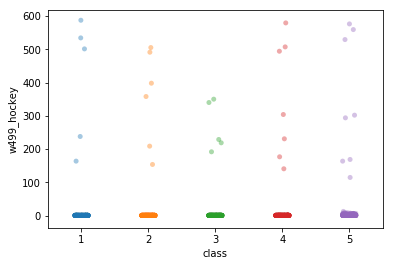

In [340]:
# (1) # Your Code goes here:
g = sns.stripplot(x="class", y="w499_hockey", data=news_raw, jitter=True, alpha=0.4)
# Because points near the 0 are hard to see, I used the code below to see it closer and gain more information
# g.set_ylim([0,30])

(2) ***Your answer goes here:***

As the attribute I selected the word hockey, expecting class 5 (and also partly class 4) to have way more points above the 1 y-value than classes 1,2 and 3. My assumption was proved partly correct by zooming in on the y axis from 0 to 30 (commented out in the code above). However, what is very peculiar is that every class had documents with very high word counts (100 to 600) for the word hockey. I presume these documents were misclassified and due to the very high word count could even be documents of just that word (e.g. the document is "Hockey hockey hockey hockey...")

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

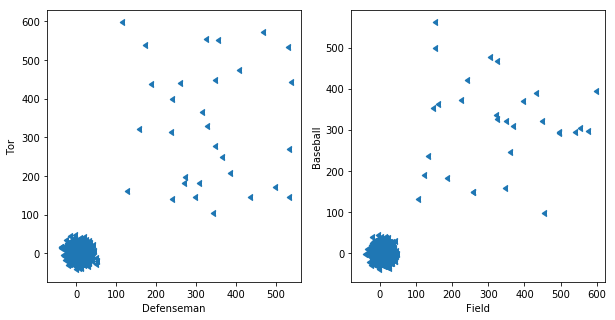

In [341]:
# (1) # Your Code goes here:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize =  (10,5))

# Create a first scatter_jitter subplot of defenseman and tor
plt.subplot(1,2,1)
scatter_jitter(news_raw["w7_defenseman"], news_raw["w21_tor"], jitter = 0.3)
plt.xlabel('Defenseman')
plt.ylabel('Tor')

# Create a second scatter_jitter subplot of field and baseball
plt.subplot(1,2,2)
scatter_jitter(news_raw["w72_field"], news_raw["w495_baseball"], jitter = 0.3)
plt.xlabel('Field')
plt.ylabel('Baseball')

plt.show()

(2) ***Your answer goes here:***

For my scatter_jitter plots I picked 2 attributes that should be closely correlated, Baseball and Field, and 2 that should have very little correlation, Tor and Defenseman (by correlation I mean appearance of one of the words in the document increases the probability that the other word will be present as well due to their meaning). However for my result I got 2 basically identical graphs which leads me to believe there is a number of documents with a very large count of every word, with their class being evenly distributed (20% got classfied as class 1, 20% as class 2 etc.). These graphs together with the previous one helped me identify that these documents should be classified as outliers and most likely removed before traning any classifier.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of documents in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***

From our initial look at the dataset (using describe() and head()) we could clearly see that even for the most common words such as "you" most of our documents contain only around 10 or so word counts. By looking at the graphs we can see all the outliers seem to have values of 100 or more. To account for potential documents where, for example, a new technology is introduced and thoroughly explained, or a common word is used very often due to context, I set a boundary of 100 (and not any lower), and therefore we will consider a document where any word appears more than 100 or more times to be an outlier and thereby rejected.

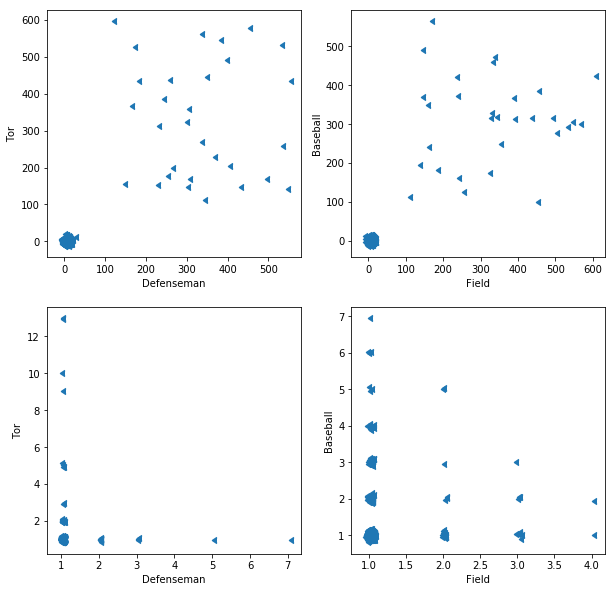

Number of documents in the cleaned dataset: 2091
Number of outliers rejected: 38


In [342]:
# (2) # Your Code goes here:
# Create a deep copy of the dataset
news_clean = news_raw.copy(deep=True)
# Remove all outliers according to our criterion
for column in news_clean.columns:
    news_clean = news_clean[news_clean[column]<100]
    
fig, ax = plt.subplots(2, 2, figsize =  (10,10))

# Create a first scatter_jitter subplot of defenseman and tor from the news_raw dataset
plt.subplot(2,2,1)
scatter_jitter(news_raw["w7_defenseman"], news_raw["w21_tor"], jitter = 0.1)
plt.xlabel('Defenseman')
plt.ylabel('Tor')

# Create a second scatter_jitter subplot of field and baseball from the news_raw dataset
plt.subplot(2,2,2)
scatter_jitter(news_raw["w72_field"], news_raw["w495_baseball"], jitter = 0.1)
plt.xlabel('Field')
plt.ylabel('Baseball')

# Create a third scatter_jitter subplot of defenseman and tor from the news_clean dataset
plt.subplot(2,2,3)
scatter_jitter(news_clean["w7_defenseman"], news_clean["w21_tor"], jitter = 0.1)
plt.xlabel('Defenseman')
plt.ylabel('Tor')

# Create a fourth scatter_jitter subplot of field and baseball from the news_clean dataset
plt.subplot(2,2,4)
scatter_jitter(news_clean["w72_field"], news_clean["w495_baseball"], jitter = 0.1)
plt.xlabel('Field')
plt.ylabel('Baseball')

plt.show() 

print('Number of documents in the cleaned dataset: {}'.format(news_clean.shape[0]))
print('Number of outliers rejected: {}'.format(news_raw.shape[0]-news_clean.shape[0]))

(3) ***Your answer goes here:***

We rejected 38 of the 2129 samples, leaving us with 2091 samples. From the graphs above, which were created with the same settings, just on different datasets, we can observe the expected behaviour. For closely correlated words such as Baseball and Field, there is a number documents which contain both of them, while for words with no apparent correlation such as Tor and Defenseman, there are 0 such documents (we don't always expect 0 but rather a very low number, also by correlation I mean appearance of one of the words in the document increases the probability that the other word will be present as well due to their meaning).

### ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

In [ ]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [343]:
# Your Code goes here:
# Load the datasets
data_path = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path, delimiter = ',')

# Reset the number of columns displayed
pd.set_option('display.max_columns', 20)
# Confirm the data is similar
display(news_train.describe())
display(news_test.describe())
print('Number of samples in traning dataset: {} and in testing dataset: {}'.format(news_train.shape[0], news_test.shape[0]))

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


Number of samples in traning dataset: 2099 and in testing dataset: 128


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***

The assumption behind the Naive Bayes Model is that the ***values of attributes are conditionally independent from one another, given a class***.


If we didn't make this assumption, our main issue would be that we would need an amount of samples exponential in the number of attributes = (number of values an attribute can take)^number of attributes. This is because all of our attributes would be dependent and we would need at least one sample for each of the specific values they could take (in practice we would need way more than one). Naive Bayes allows us to bypass this by assuming conditional independence and allows us to effectively reduce the amount of "required" samples to a multiple = number of values an attribute can take x number of attributes (assuming required = 1). The samples allow us to calculate probabilities which we use to classify a sample (both of the questions could be answered using probability equations but I went for a more wordy approach).

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

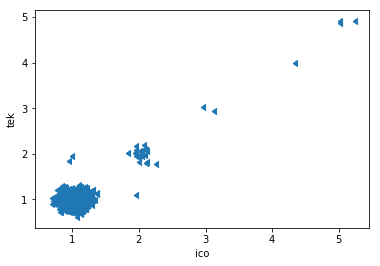

In [344]:
# (1) # Your Code goes here:
scatter_jitter(news_train["w281_ico"], news_train["w273_tek"], jitter = 0.5)
plt.xlabel('ico')
plt.ylabel('tek')
plt.show()

(2) ***Your answer goes here:***

These features appear to be mutually dependent (I used the word correlated earlier in the coursework to mean the same thing), however this does not impact the validity of the Naive Bayes assumption as we only assume **conditional independence** rather than mutual independence.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

A reasonable baseline for classification could be using a classifier which classifies every datapoint according to the most frequent class in the training dataset.

In [345]:
# (2) # Your Code goes here:
# Extract true classes
y_trues = news_train["class"]
# Create array of predicted classes with every prediction being the mode (most frequent class)
baseline = news_train["class"].mode()
y_preds = np.full(y_trues.shape, baseline)
# Calculate the accuracy score
print('Baseline classifier accuracy on training data: {:.6f}'.format(accuracy_score(y_trues, y_preds)))

Baseline classifier accuracy on training data: 0.212959


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [348]:
# (1) # Your Code goes here:
# Extract training data and its class
X = news_train.drop("class", axis=1)
y = news_train["class"]
# Train classifier
gnb = GaussianNB()
gnb.fit(X=X, y=y)

GaussianNB(priors=None)

Gaussian Naive Bayes classifier accuracy on training data: 0.878037


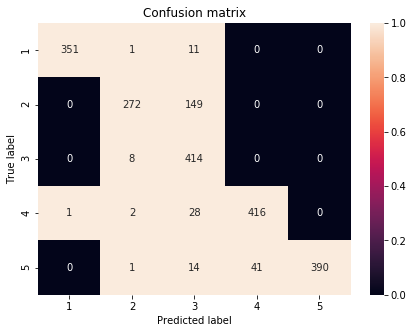

In [349]:
# (2) # Your Code goes here:
# Get the predicted classes and calculate the accuracy and the confusion matrix
X_preds = gnb.predict(X)
print('Gaussian Naive Bayes classifier accuracy on training data: {:.6f}'.format(accuracy_score(y, X_preds)))
cm = confusion_matrix(y,X_preds)
# Use the utility function for plotting confusion matrices
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, fmt='g')
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot our confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cm, classes=['1', '2', '3', '4', '5'])

(3) ***Your answer goes here:***

Our model performed well on the data with an accuracy of almost 88% which is much higher than the baseline classifier we used. Accuracy is a reasonable metric to use as the classes are balanced and therefore there isn't a  way to achieve high accuracy with a very simple model.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

Our confusion matrix tells us that we made the highest amount of misclassifications between classes 2 and 3 and classes 4 and 5. This is exactly what we expected as those are the classes that are closely related (2 and 3 are comp.sys.ibm.pc.hardware and comp.sys.mac.hardware respectively, while 4 and 5 are rec.sport.baseball and rec.sport.hockey respectively).

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

Gaussian Naive Bayes classifier accuracy on testing data: 0.820312


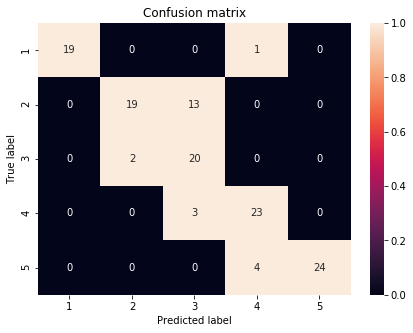

In [350]:
# (1) # Your Code goes here:
# Extract testing data and its class
X = news_test.drop("class", axis=1)
y = news_test["class"]
# Get the predicted classes and calculate the accuracy and the confusion matrix
X_preds = gnb.predict(X)
print('Gaussian Naive Bayes classifier accuracy on testing data: {:.6f}'.format(accuracy_score(y, X_preds)))
cm = confusion_matrix(y,X_preds)
# Plot our confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cm, classes=['1', '2', '3', '4', '5'])

In [351]:
# (2) # Your Code goes here:
# Extract true classes from testing data
y_trues = news_test["class"]
# Create array of predicted classes with every prediction being the mode (most frequent class)
y_preds = np.full(y_trues.shape, news_test["class"].mode())
# Calculate the accuracy score
print('Baseline classifier accuracy on testing data: {}'.format(accuracy_score(y_trues, y_preds)))

Baseline classifier accuracy on testing data: 0.25


(3) ***Your answer goes here:***

a)
While our baseline classifier performed slightly better (around 4%) on the testing data than on the training data, this can be attributed to the fact there are fewer samples in the testing data and as a result the classes aren't as well balanced as they are in the training data. Even still, the accuracy is very poor when compared to the Gaussian Naive Bayes classifier and therefore this baseline classifier offers very little value compared to our trained classifier.

b)
Our Gaussian Naive Bayes classifier achieved only a slightly lower accuracy (around 5%) on the testing data than on the training data and overall performed well. From the confusion matrix we can once again see that misclassification occured most frequently between classes 2 and 3 and classes 4 and 5. Overall our classifier achieved relatively high accuracy and performed well on both sets. 

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [ ]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***